# Eksploracja Danych 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
fifa_data = pd.read_csv('new_data.csv')

## Analiza Rozkładu Wybranyh Cech

Rozkład cech `Overall`, `Age`, `Height`, `Weight` wg `Position`

<Figure size 864x576 with 0 Axes>

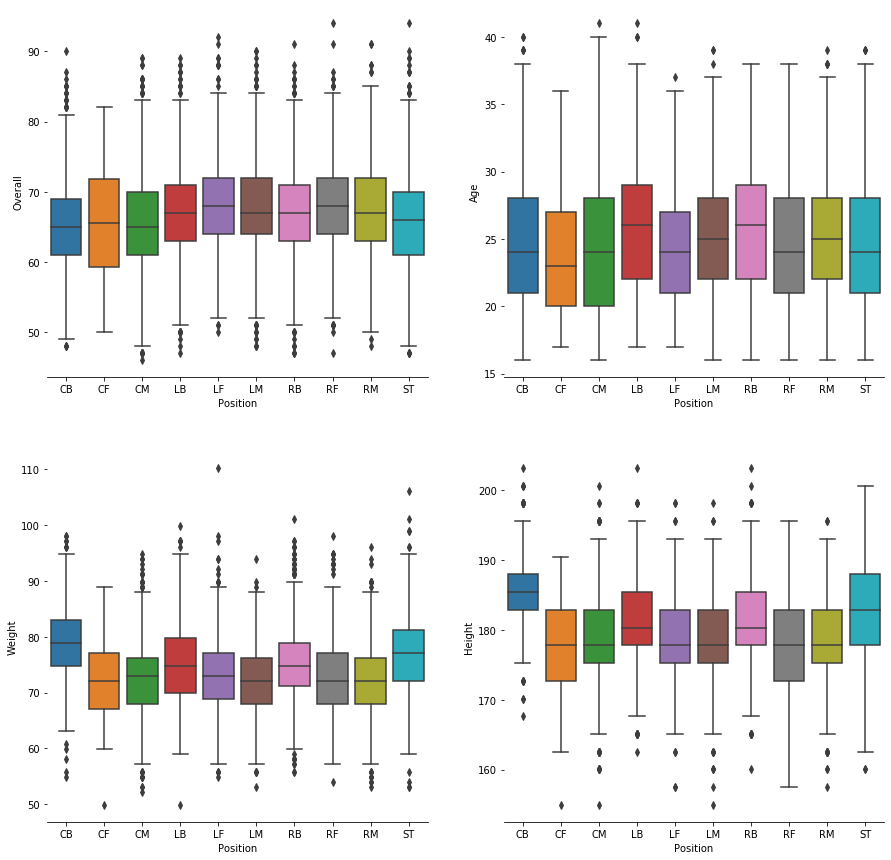

In [21]:
plt.figure(figsize=(12, 8))

f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)

positions = sorted(fifa_data['Position'].unique())

sns.boxplot('Position', 'Overall', data = fifa_data, ax=axes[0, 0], order=positions)
sns.boxplot('Position', 'Age', data = fifa_data, ax=axes[0, 1],order=positions)
sns.boxplot('Position', 'Height', data = fifa_data, ax=axes[1, 1], order=positions)
sns.boxplot('Position', 'Weight', data = fifa_data, ax=axes[1, 0], order=positions)

Rozkład `Preferred Foot` pomiedzy kategoriami `Position`

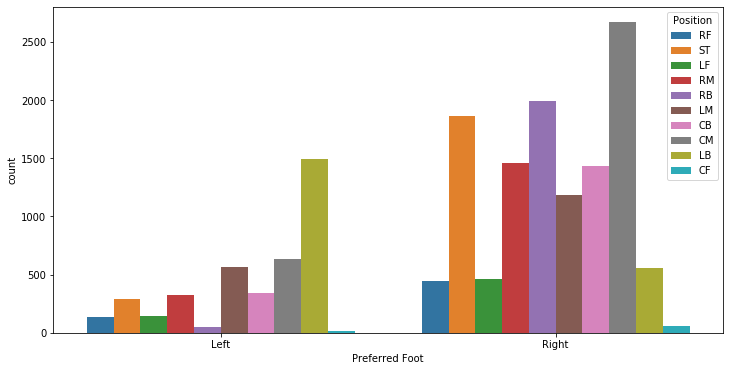

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='Preferred Foot', data=fifa_data, hue='Position')

## Korelacja pomiędzy cechami

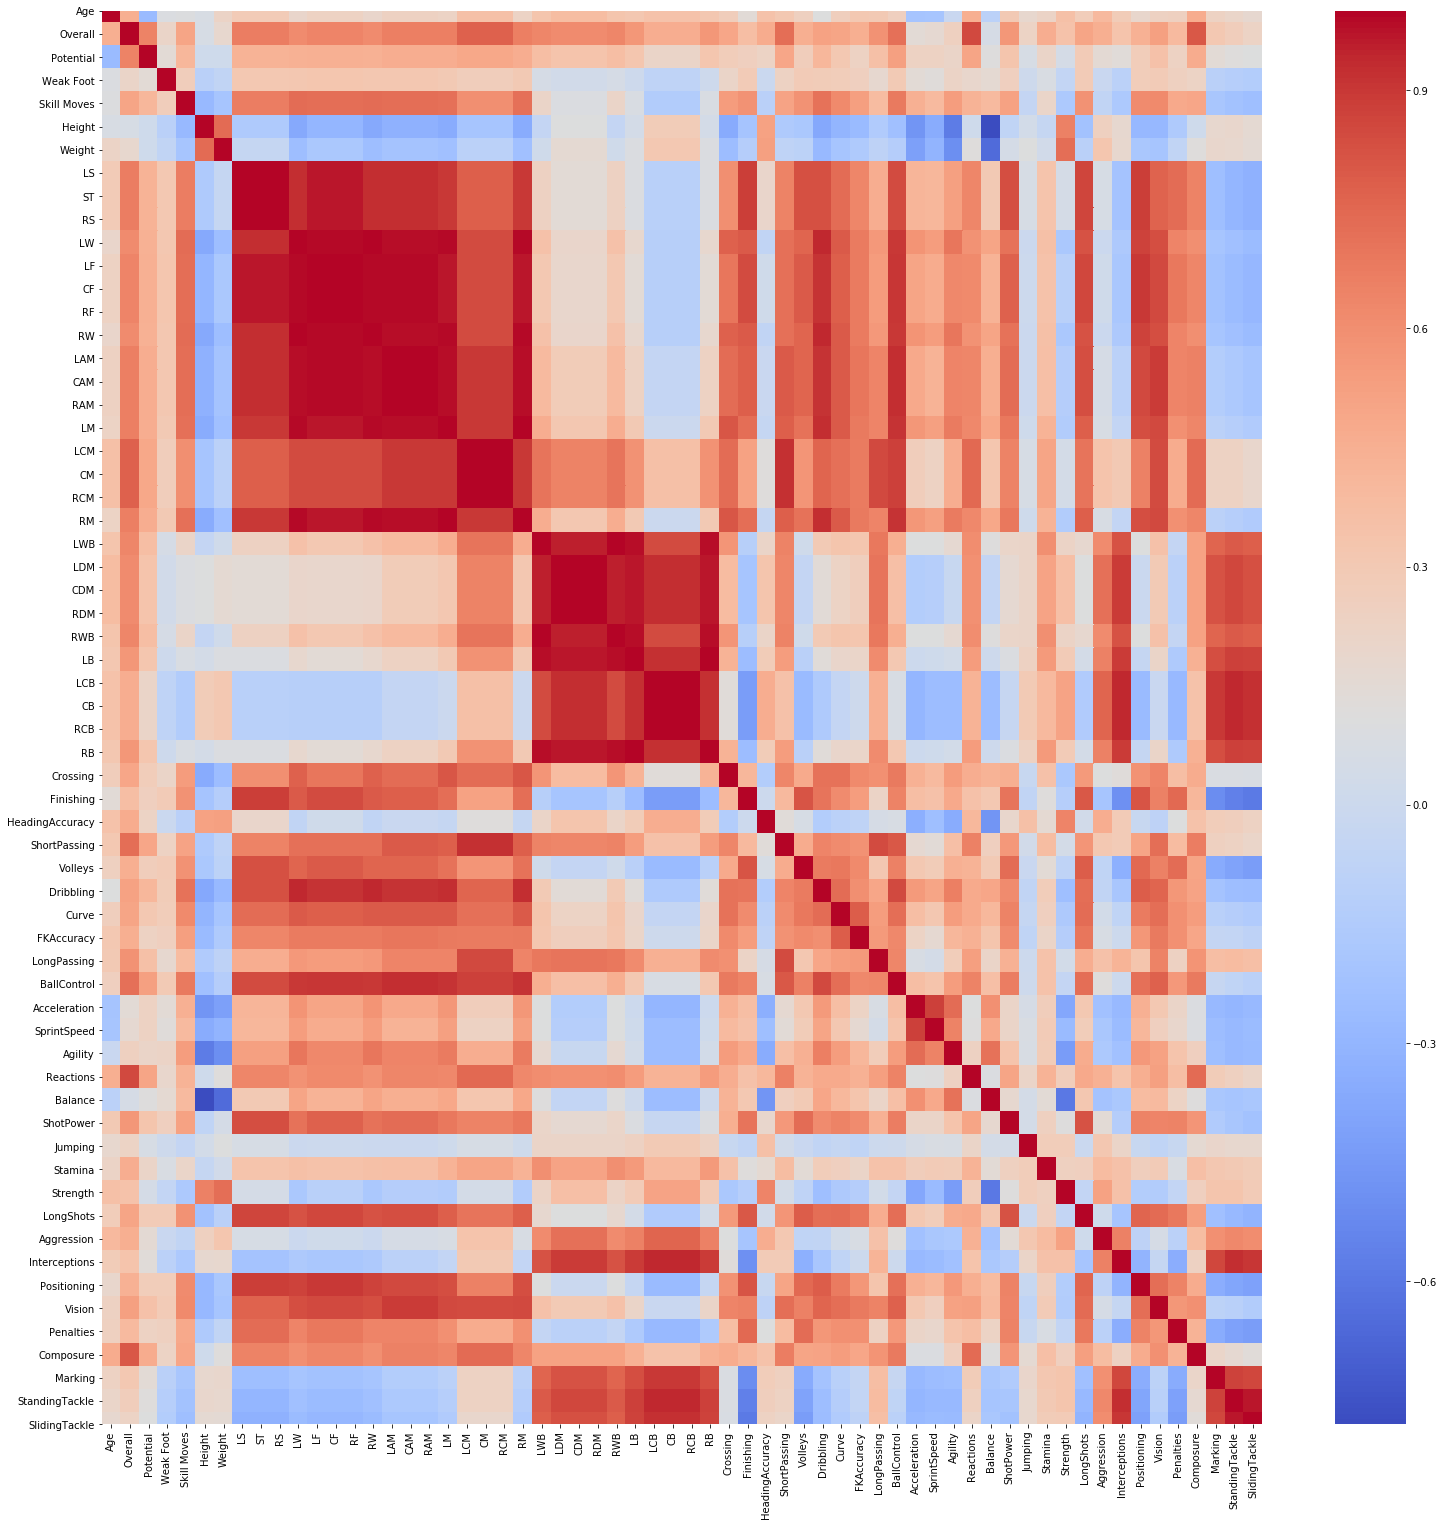

In [23]:
corr = fifa_data.corr()

plt.figure(figsize=(26,26))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

In [24]:
CORRELATION_THRESHLOD = 0.75

correlated_features = set()
for i in range(len(corr.columns)):  
    for j in range(i):
        if abs(corr.iloc[i, j]) > CORRELATION_THRESHLOD:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [25]:
len(correlated_features)

46

In [26]:
correlated_features


{'Aggression',
 'Balance',
 'BallControl',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'FKAccuracy',
 'Finishing',
 'Interceptions',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LW',
 'LongPassing',
 'LongShots',
 'Marking',
 'Positioning',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'Reactions',
 'ST',
 'ShortPassing',
 'ShotPower',
 'SlidingTackle',
 'SprintSpeed',
 'StandingTackle',
 'Vision',
 'Volleys'}

In [27]:
new_fifa_data = fifa_data.drop(columns=correlated_features, axis=1)

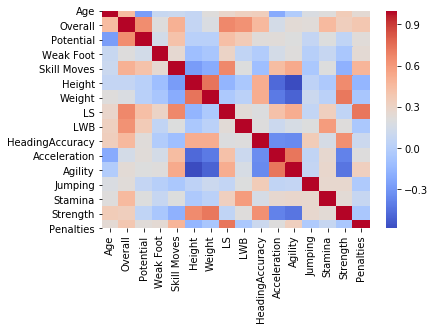

In [28]:
sns.heatmap(new_fifa_data.corr(), cmap='coolwarm')